<a href="https://colab.research.google.com/github/mariyagolchin/Heart-diseases-Prediction-using-MachineLearning/blob/main/mlp_heart_attack_analysis_beginner_friendly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)h

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Task 1 - Importing Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.monospace'] = 'Ubunto Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (16,10)
import random
random.seed(21)
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KaggleData/HeartDiseasePrediction/heart.csv')
df

# Task 2 - Exploratory Data Analysis (EDA) 

In [ ]:
df.shape

Checking the number of unique values for each feature of dataset :

In [ ]:
df.nunique()

If we carefully look from the above output, then we'll get to know that all features in this dataset are numerical features with some discrete valued features and some continuous valued features.

Features with discrete values are age, sex, cp, fbs, restecg, exng, slp, caa, thall, output and rest are numerical features with values that can be assumed as continuous.

In [ ]:
df.info()

In [ ]:
## Checking the NULL values in the dataset
df.isna().sum()

In [ ]:
## Statistics of the dataset
df.describe()

In [ ]:
## Correlation plot
corr = df.corr()
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

From the above plot we can conclude that the output is moderately correlated with features like 'cp','thalachh','exng','oldpeak','slp','caa','thall'. Further in this kernel, we are going to analysis every feature with respect to output and other features.

In [ ]:
## Pairplot
sns.pairplot(df,diag_kind='kde',hue='target')

From here onwards, we are going to perform both univariate and multivariate analysis on every feature of the dataset in order to have insights above the data.

In [ ]:
df['target'].value_counts()

There are 138 negative instances and 165 positive instances. Thus, this dataset is not imbalanced otherwise we have to make arrangements for handling the imbalanced dataset.

In [ ]:
## Functions for creating barplot and for adding labels on the respective bars
def addlabels(x,y,df):
    for i in range(len(x)):
        plt.text(i,y[i]+5,str(np.round((y[i]/df.shape[0])*100,1)) + "%")
def barplot(df,feature):
    plt.figure(figsize=(8,4))
    y = df[feature].value_counts().sort_index(ascending=True).values
    x = list(df[feature].value_counts().sort_index(ascending=True).index)
    addlabels(x,y,df)
    sns.countplot(df[feature])

### Barplot of Feature "Output"

In [ ]:
barplot(df,'target')

### Feature "age"

In [ ]:
df['age']

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "target",y = "age",data = df)

Since dataset is small and the outliers are very less in the feature "age" and not much extreme, so we need not to make changes.

In [ ]:
## Total unique values with their frequencies
df['age'].value_counts()

In [ ]:
age = df['age'].value_counts().sort_index(ascending=True)

In [ ]:
sns.countplot(x = df['age'])

From the above plot, most of the persons in this dataset are having age in between 41 - 67 years.

In [ ]:
## Countplot of the feature "age" with respect to output.
sns.countplot(x = df['age'],hue=df['target'])

Looks like persons having age 41,44,51,52,54 years, have more chances of heart attack than others.

In [ ]:
## Age distribution of can Heart attack
plt.figure(figsize = (15,5))
plt.plot(age)
plt.xlabel("Age of the person")
plt.ylabel("Frequency count of ages")
plt.title("Age distribution of Heart attack dataset")
plt.show()

In [ ]:
age_0 = df[df['target'] == 0]['age'].value_counts().sort_index(ascending=True)
age_1 = df[df['target'] == 1]['age'].value_counts().sort_index(ascending=True)

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(age_0,c='c',label="didn't get heart attack")
plt.plot(age_1,c='r',label='get heart attack')
plt.xlabel("Age of the person")
plt.ylabel("Frequency count of ages")
plt.title("Age distribution of Heart attack dataset")
plt.legend()
plt.show()

### Feature "Sex"

In [ ]:
df['sex']

In [ ]:
df['sex'].value_counts()

In [ ]:
barplot(df,'sex')

Hence, this dataset contains more instances of one gender than other.

In [ ]:
sns.catplot(x='target',y='age',hue='sex',data=df,kind='bar')

### Feature "Cp"

In [ ]:
df['cp']

In [ ]:
df['cp'].value_counts()

In [ ]:
barplot(df,'cp')

Feature "cp" is distributed over 4 categories.

In [ ]:
sns.catplot(x='cp',y='age',hue='target',data=df,kind='bar')

### Feature "trtbps"

In [ ]:
df['trestbps']

In [ ]:
df['trestbps'].value_counts()

In [ ]:
sns.distplot(df['trestbps'])

Fairly Normal distributed feature with some positive skewness.

In [ ]:
sns.lmplot(x='age',y='trestbps',hue='target',data=df)

In [ ]:
sns.jointplot(x='age',y='trestbps',kind='reg',data=df)

### Feature "chol"

In [ ]:
df['chol']

In [ ]:
sns.distplot(df['chol'])

Can be assumed as normaly distributed with positive skewness.

In [ ]:
sns.scatterplot(x='age',y='chol',hue='target',data=df)

In [ ]:
sns.jointplot(x='age',y='chol',kind='reg',data=df)

### Feature "fbs"

In [ ]:
df['fbs']

In [ ]:
barplot(df,'fbs')

### Feature "restecg"

In [ ]:
barplot(df,'restecg')

Very few instances having "restecg" value as 2 are present. They maybe because of error and therefore we are going to merge them into the majority category of value 1.

In [ ]:
df['restecg'].value_counts()

In [ ]:
df['restecg'].replace([2],[1],inplace=True)

In [ ]:
barplot(df,'restecg')

### Feature "thalachh"

In [ ]:
sns.distplot(df['thalach'])

Normal distributed to some extent with negative skewness.

In [ ]:
sns.scatterplot(x='thalach',y='age',hue='target',data=df)

In [ ]:
sns.lmplot(y='age',x='thalach',hue='target',data=df)

In [ ]:
sns.lmplot(y='chol',x='thalach',hue='target',data=df)

In [ ]:
sns.lmplot(y='trestbps',x='thalach',hue='target',data=df)

### Feature "exng"

In [ ]:
df['exang'].value_counts()

In [ ]:
barplot(df,'exang')

### Feature "oldpeak"

In [ ]:
sns.distplot(df['oldpeak'])

Positively skewed.

In [ ]:
sns.scatterplot(y='oldpeak',x='age',hue='target',data=df)

In [ ]:
sns.lmplot(y='age',x='oldpeak',hue='target',data=df)

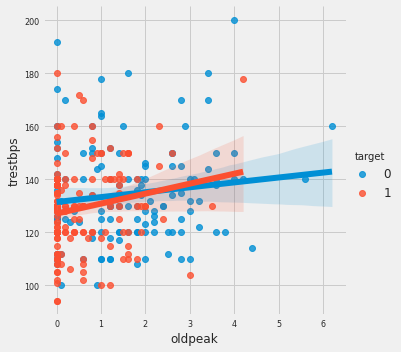

In [108]:
sns.lmplot(y='trestbps',x='oldpeak',hue='target',data=df)

In [ ]:
sns.lmplot(y='chol',x='oldpeak',hue='target',data=df)

In [ ]:
sns.lmplot(y='thalach',x='oldpeak',hue='target',data=df)

### Feature "slp"

In [ ]:
barplot(df,'slp')

### Feature "caa"

In [ ]:
barplot(df,'caa')

In [ ]:
df['caa'].value_counts()

In [ ]:
df['caa'].replace([4],[0],inplace=True)

In [ ]:
barplot(df,'caa')

### Feature "thall"

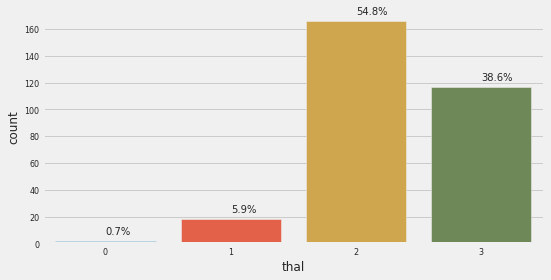

In [111]:
barplot(df,'thal')

In [ ]:
df['thall'].value_counts()

In [ ]:
df['thall'].replace([0],[2],inplace=True)

In [ ]:
barplot(df,'thall')

In [ ]:
df.info()

# Task 3 - Data preparation for model evaluation

In [ ]:
X = df.drop(['target'],axis=1)
y = df['target']
print(X.shape,y.shape)

(303, 13) (303,)


In [113]:
## Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)
x_train = pd.DataFrame(x_train,columns = df.drop(['target'],axis=1).columns)
x_train.index = range(x_train.shape[0])
x_test = pd.DataFrame(x_test,columns = df.drop(['target'],axis=1).columns)
x_test.index = range(x_test.shape[0])
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(227, 13) (227,)
(76, 13) (76,)


In [122]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [123]:
num_features = ['age','trestbps','chol','thalach','oldpeak']
cat_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

### Applying scaling to numerical features only.

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
scaler.fit(x_train[num_features])
x_train_scaled = pd.DataFrame(scaler.transform(x_train[num_features]),columns=num_features)
x_test_scaled = pd.DataFrame(scaler.transform(x_test[num_features]),columns=num_features)


In [125]:
x_train_scaled

,age,trestbps,chol,thalach,oldpeak
0,0.58,0.61,0.23,0.67,0.00
1,0.62,0.33,0.20,0.40,0.39
2,0.79,0.32,0.28,0.66,0.04
3,0.60,0.32,0.21,0.49,0.07
4,0.19,0.45,0.10,0.75,0.00
...,...,...,...,...,...
222,0.44,0.47,0.24,0.66,0.11
223,0.46,0.00,0.22,0.58,0.00
224,0.83,0.67,0.24,0.38,0.02
225,0.35,0.27,0.27,0.49,0.14


In [126]:
x_test_scaled

,age,trestbps,chol,thalach,oldpeak
0,0.58,0.57,0.33,0.21,0.11
1,0.62,0.78,0.36,0.62,0.04
2,0.58,0.57,-0.01,0.75,0.04
3,0.56,0.41,0.64,0.54,0.34
4,0.87,0.16,0.31,0.37,0.00
...,...,...,...,...,...
71,0.27,0.47,0.22,0.79,0.00
72,0.69,0.57,0.26,0.58,0.25
73,0.40,0.29,0.21,0.86,0.00
74,0.73,0.52,0.19,0.39,0.36


In [127]:
x_train_scaled.shape

(227, 5)

In [128]:
x_train_scaled[cat_features] = x_train[cat_features]
x_test_scaled[cat_features] = x_test[cat_features]

In [129]:
x_train_scaled

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,0.58,0.61,0.23,0.67,0.00,1,1,0,0,0,2,1,2
1,0.62,0.33,0.20,0.40,0.39,1,2,1,1,0,1,1,1
2,0.79,0.32,0.28,0.66,0.04,1,0,1,1,0,1,2,3
3,0.60,0.32,0.21,0.49,0.07,1,1,0,1,0,1,4,3
4,0.19,0.45,0.10,0.75,0.00,1,2,0,1,0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.44,0.47,0.24,0.66,0.11,1,2,0,1,0,1,1,3
223,0.46,0.00,0.22,0.58,0.00,1,2,0,1,1,2,1,3
224,0.83,0.67,0.24,0.38,0.02,1,3,1,0,0,1,1,2
225,0.35,0.27,0.27,0.49,0.14,1,0,0,0,0,2,0,3


In [130]:
x_test_scaled

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,0.58,0.57,0.33,0.21,0.11,1,0,0,0,1,1,1,1
1,0.62,0.78,0.36,0.62,0.04,1,3,0,0,0,1,0,3
2,0.58,0.57,-0.01,0.75,0.04,1,2,1,1,0,2,1,3
3,0.56,0.41,0.64,0.54,0.34,0,0,0,0,1,1,2,3
4,0.87,0.16,0.31,0.37,0.00,0,2,1,0,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.27,0.47,0.22,0.79,0.00,1,0,0,1,0,2,0,2
72,0.69,0.57,0.26,0.58,0.25,0,0,0,1,1,1,0,2
73,0.40,0.29,0.21,0.86,0.00,1,0,0,0,0,2,0,2
74,0.73,0.52,0.19,0.39,0.36,1,0,0,0,0,1,2,1


In [131]:
x_train_scaled = x_train_scaled.values
x_test_scaled = x_test_scaled.values

### Automate Feature Selection 

In [132]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=60)
select.fit(x_train_scaled, y_train)
# transform training set
x_train_selected = select.transform(x_train_scaled)
print("x_train.shape: {}".format(x_train.shape))
print("x_train_selected.shape: {}".format(x_train_selected.shape))

x_train.shape: (227, 13)
x_train_selected.shape: (227, 8)


[False False False  True  True  True  True False False  True  True  True
  True]


Text(0.5, 0, 'Sample Index')

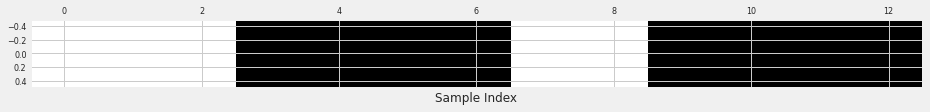

In [133]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('Sample Index')

The above plot shows which features have been selected (in black).

In [134]:
## Preparing the train and test set with the selected features only.
x_train_scaled = select.transform(x_train_scaled)
x_test_scaled = select.transform(x_test_scaled)

# Task 4 - Model evaluation

### K-Nearest Neighbor

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_scaled,y_train)
print(knn.score(x_train_scaled,y_train))
print(knn.score(x_test_scaled,y_test))

0.8678414096916299
0.881578947368421


For k = 1 : Training accuracy 1.000 and Testing accuracy 0.776
For k = 2 : Training accuracy 0.885 and Testing accuracy 0.816
For k = 3 : Training accuracy 0.885 and Testing accuracy 0.868
For k = 4 : Training accuracy 0.877 and Testing accuracy 0.868
For k = 5 : Training accuracy 0.868 and Testing accuracy 0.882
For k = 6 : Training accuracy 0.859 and Testing accuracy 0.842
For k = 7 : Training accuracy 0.855 and Testing accuracy 0.882
For k = 8 : Training accuracy 0.872 and Testing accuracy 0.868
For k = 9 : Training accuracy 0.872 and Testing accuracy 0.882
For k = 10 : Training accuracy 0.868 and Testing accuracy 0.868


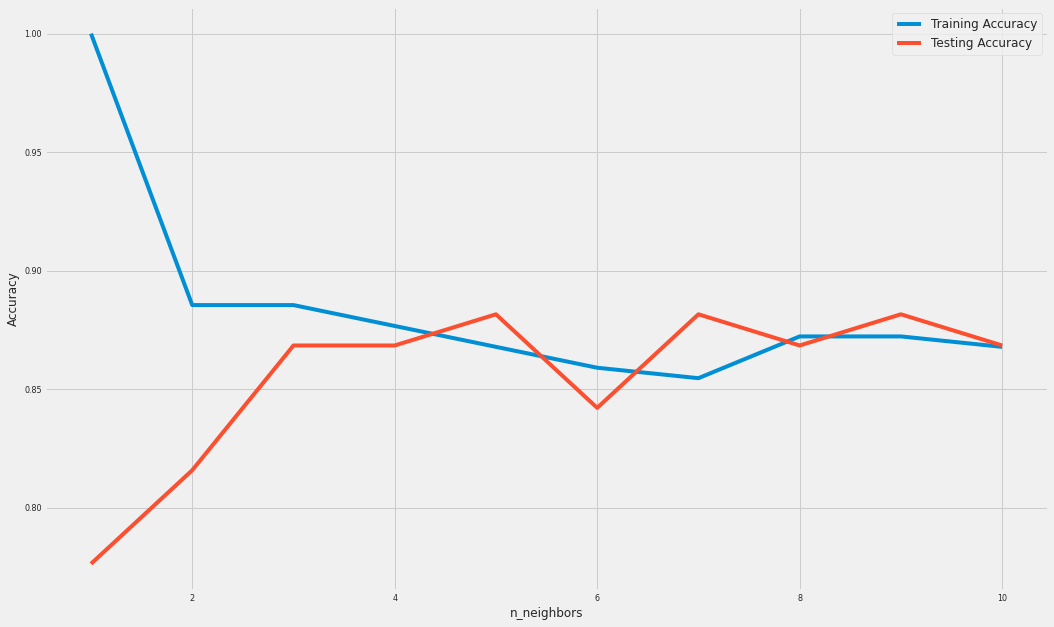

In [136]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
testing_accuracy=[]
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors,n_jobs=-1)
    clf.fit(x_train_scaled,y_train)
    training_accuracy.append(clf.score(x_train_scaled,y_train))
    testing_accuracy.append(clf.score(x_test_scaled,y_test))
    print("For k = {:.0f} : Training accuracy {:.3f} and Testing accuracy {:.3f}".format(n_neighbors,clf.score(x_train_scaled,y_train),clf.score(x_test_scaled,y_test)))
plt.plot(neighbors_settings,training_accuracy,label='Training Accuracy')
plt.plot(neighbors_settings,testing_accuracy,label='Testing Accuracy')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()


From the above plot, the optimal value of k is 9 with training accuracy 0.868 and testing accuracy 0.895

### Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10)
logreg.fit(x_train_scaled,y_train)
print("Trainig Score:",logreg.score(x_train_scaled,y_train))
print("Testing Score:",logreg.score(x_test_scaled,y_test))

Trainig Score: 0.8281938325991189
Testing Score: 0.868421052631579


### Linear SVC

In [138]:
from sklearn.svm import LinearSVC
linearsvm = LinearSVC().fit(x_train_scaled,y_train)
print("Coefficient :",linearsvm.coef_)
print("Intercept :",linearsvm.intercept_)
print("Trainig Score:",linearsvm.score(x_train_scaled,y_train))
print("Testing Score:",linearsvm.score(x_test_scaled,y_test))

Coefficient : [[ 0.52090652 -1.01328992 -0.42703459  0.28268458 -0.41574751  0.25217129
  -0.28405122 -0.31953093]]
Intercept : [0.68482994]
Trainig Score: 0.8325991189427313
Testing Score: 0.868421052631579


### Decision Tree Classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x_train_scaled,y_train)
print("Training Accuracy {:.3f}".format(tree.score(x_train_scaled,y_train)))
print("Testing Accuracy {:.3f}".format(tree.score(x_test_scaled,y_test)))

Training Accuracy 0.890
Testing Accuracy 0.816


In [140]:
## Performing cross validation for hyperparamter tunning of DecisionTreeClassifier model.
from sklearn.model_selection import GridSearchCV
param_test = {
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' :[2,3,4,5]
}
tree_cv = GridSearchCV(estimator= DecisionTreeClassifier(),
                             param_grid = param_test,scoring='accuracy',
                             n_jobs=-1,cv=5)
tree_cv.fit(x_train_scaled,y_train)
## This best score is the mean of five cross validation folds with the best hyperparamters. 
print(tree_cv.best_params_, tree_cv.best_score_)
print("Training Accuracy {:.3f}".format(tree_cv.score(x_train_scaled,y_train)))
print("Testing Accuracy {:.3f}".format(tree_cv.score(x_test_scaled,y_test)))

{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 3} 0.7891787439613527
Training Accuracy 0.872
Testing Accuracy 0.750


### MLP Classifier

In [141]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier().fit(x_train_scaled,y_train)
print("Training Accuracy {:.3f}".format(clf.score(x_train_scaled,y_train)))
print("Testing Accuracy {:.3f}".format(clf.score(x_test_scaled,y_test)))

Training Accuracy 0.859
Testing Accuracy 0.882


In [142]:
## Performing cross validation for hyperparamter tunning of MLPClassifier model.
param_test = {
    'activation' : ['logistic', 'tanh', 'relu'],
    'alpha' : [0.01,0.1,0.5,1],
    'learning_rate' : ['adaptive']
    
}
mlp_cv = GridSearchCV(estimator= MLPClassifier(),
                             param_grid = param_test,scoring='accuracy',
                             n_jobs=-1,cv=5)
mlp_cv.fit(x_train_scaled,y_train)
## This best score is the mean of five cross validation folds with the best hyperparamters. 
print(mlp_cv.best_params_, mlp_cv.best_score_)
print("Training Accuracy {:.3f}".format(mlp_cv.score(x_train_scaled,y_train)))
print("Testing Accuracy {:.3f}".format(mlp_cv.score(x_test_scaled,y_test)))

{'activation': 'logistic', 'alpha': 0.1, 'learning_rate': 'adaptive'} 0.8326570048309179
Training Accuracy 0.824
Testing Accuracy 0.868


### Random Forest Classifier

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,max_depth=4).fit(x_train_scaled,y_train)
print("Training Accuracy {:.3f}".format(rf.score(x_train_scaled,y_train)))
print("Testing Accuracy {:.3f}".format(rf.score(x_test_scaled,y_test)))

Training Accuracy 0.903
Testing Accuracy 0.855


In [144]:
## Performing cross validation for hyperparamter tunning of Random Forest Classifier model.
param_test = {
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' :[2,3,4,5]
}
rf_cv = GridSearchCV(estimator= RandomForestClassifier(n_estimators=500),
                             param_grid = param_test,scoring='accuracy',
                             n_jobs=-1,cv=5)
rf_cv.fit(x_train_scaled,y_train)
## This best score is the mean of five cross validation folds with the best hyperparamters. 
print(rf_cv.best_params_, rf_cv.best_score_)
print("Training Accuracy {:.3f}".format(rf_cv.score(x_train_scaled,y_train)))
print("Testing Accuracy {:.3f}".format(rf_cv.score(x_test_scaled,y_test)))

{'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.841256038647343
Training Accuracy 0.859
Testing Accuracy 0.855


### Gradient Boosting Classifier

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier()
gbrt.fit(x_train_scaled,y_train)
print("Training Accuracy {:.3f}".format(gbrt.score(x_train_scaled,y_train)))
print("Testing Accuracy {:.3f}".format(gbrt.score(x_test_scaled,y_test)))

Training Accuracy 0.987
Testing Accuracy 0.789


In [146]:
## Performing cross validation for hyperparamter tunning of GradientBoostingClassifier model.
param_test = {
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split': np.arange(2, 12, 3),
    'min_samples_leaf': np.arange(1, 10, 3)
}
gbrt_cv = GridSearchCV(estimator= GradientBoostingClassifier(n_estimators=1000),
                             param_grid = param_test,scoring='accuracy',
                             n_jobs=-1,cv=5)
gbrt_cv.fit(x_train_scaled,y_train)
print(gbrt_cv.best_params_, gbrt_cv.best_score_)
print("Training Accuracy {:.3f}".format(gbrt_cv.score(x_train_scaled,y_train)))
print("Testing Accuracy {:.3f}".format(gbrt_cv.score(x_test_scaled,y_test)))

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.8062801932367151
Training Accuracy 1.000
Testing Accuracy 0.763


### XGB Classifier

In [147]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=1)
xgb.fit(x_train_scaled,y_train)
print("Training Accuracy {:.3f}".format(xgb.score(x_train_scaled,y_train)))
print("Testing Accuracy {:.3f}".format(xgb.score(x_test_scaled,y_test)))

Training Accuracy 0.872
Testing Accuracy 0.855


### AdaBoost Classifier

In [148]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=1000,learning_rate=0.05)
ada.fit(x_train_scaled,y_train)
print("Training Accuracy {:.3f}".format(ada.score(x_train_scaled,y_train)))
print("Testing Accuracy {:.3f}".format(ada.score(x_test_scaled,y_test)))

Training Accuracy 0.903
Testing Accuracy 0.842


### LightGBM

In [149]:
import lightgbm
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(max_depth=1,learning_rate=0.1,reg_alpha=0.05,reg_lambda=0.01)
lgbm.fit(x_train_scaled, y_train)
print("Training Accuracy {:.3f}".format(lgbm.score(x_train_scaled,y_train)))
print("Testing Accuracy {:.3f}".format(lgbm.score(x_test_scaled,y_test)))

Training Accuracy 0.877
Testing Accuracy 0.868


### Dense layer based ANN Classifier

In [151]:
import keras
import tensorflow as tf

In [150]:
def make_model():
    model = keras.Sequential()
    model.add(tf.keras.layers.Dense(128,activation='tanh',input_shape=(x_train_scaled.shape[1],)))
    model.add(tf.keras.layers.Dense(64,activation='tanh'))
    #model.add(tf.keras.layers.Dense(32,activation='tanh'))
    model.add(tf.keras.layers.Dense(16,activation='tanh'))
    model.add(tf.keras.layers.Dense(4,activation='tanh'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='Adam',metrics=['accuracy'])
    return model
    

In [152]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 10,521
Trainable params: 10,521
Non-trainable params: 0
_________________________________________________________________


In [153]:
model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=20,batch_size=32,
          callbacks=[
              tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5),
              tf.keras.callbacks.ModelCheckpoint('model_{val_accuracy:.3f}.h5',
                                                save_best_only=True,save_weights_only=False,mode='auto',
                                                monitor='val_accuracy')
              
    
])

Epoch 1/20
8/8 [==============================] - 1s 38ms/step - loss: 0.5930 - accuracy: 0.6916 - val_loss: 0.4634 - val_accuracy: 0.8684
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 0.4534 - accuracy: 0.8194 - val_loss: 0.4237 - val_accuracy: 0.8553
Epoch 3/20
8/8 [==============================] - 0s 8ms/step - loss: 0.4195 - accuracy: 0.8062 - val_loss: 0.3887 - val_accuracy: 0.8816
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 0.4125 - accuracy: 0.8194 - val_loss: 0.3938 - val_accuracy: 0.8684
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 0.4085 - accuracy: 0.8238 - val_loss: 0.4105 - val_accuracy: 0.8553
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 0.3894 - accuracy: 0.8238 - val_loss: 0.3820 - val_accuracy: 0.8684
Epoch 7/20
8/8 [==============================] - 0s 6ms/step - loss: 0.3981 - accuracy: 0.7974 - val_loss: 0.3842 - val_accuracy: 0.8684
Epoch 8/20
8/8 [=================

### Final Scores of every model

In [154]:
print("The score of KNN with k = 9: {:.3f}".format(testing_accuracy[8]))
print("The score of Logistic Regression : {:.3f}".format(logreg.score(x_test_scaled,y_test)))
print("The score of Linear SVC : {:.3f}".format(linearsvm.score(x_test_scaled,y_test)))
print("The score of Decision Tree Classifier : {:.3f}".format(tree_cv.score(x_test_scaled,y_test)))
print("The score of MLP Classifier : {:.3f}".format(mlp_cv.score(x_test_scaled,y_test)))
print("The score of Random Forest Classifier : {:.3f}".format(rf_cv.score(x_test_scaled,y_test)))
print("The score of Gradient Boosting Classifier : {:.3f}".format(gbrt_cv.score(x_test_scaled,y_test)))
print("The score of XGB Classifier : {:.3f}".format(xgb.score(x_test_scaled,y_test)))
print("The score of AdaBoost Classifier : {:.3f}".format(ada.score(x_test_scaled,y_test)))
print("The score of LighGBM Classifier : {:.3f}".format(lgbm.score(x_test_scaled,y_test)))
print("The score of ANN Classifier : ",(model.evaluate(x_test_scaled,y_test)))

The score of KNN with k = 9: 0.882
The score of Logistic Regression : 0.868
The score of Linear SVC : 0.868
The score of Decision Tree Classifier : 0.750
The score of MLP Classifier : 0.868
The score of Random Forest Classifier : 0.855
The score of Gradient Boosting Classifier : 0.763
The score of XGB Classifier : 0.855
The score of AdaBoost Classifier : 0.842
The score of LighGBM Classifier : 0.868
3/3 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.8421
The score of ANN Classifier :  [0.39873260259628296, 0.8421052694320679]


## End Notes

Most of the model performed very well and similar as this dataset is not much complicated and most of the features are category based. The best testing accuracy in my case is with KNN and MLP Classifier.

I would suggest more hypertunning and feature engineering can bring better results also.

This is the best intution I have. If anyone is having better approaches or better analysis, please let me know. Any kind of queries, improvements or feedbacks are most welcome.

If you like my work, please show your appreciation by upvoting the notebook. Thank you...............!!!!!!!